In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
CSV_PATH = 'pilot1_results.csv'

/var/folders/q8/n2_1lzsn3rv0323mm7873r4w0000gn/T/ipykernel_20494/3818651647.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


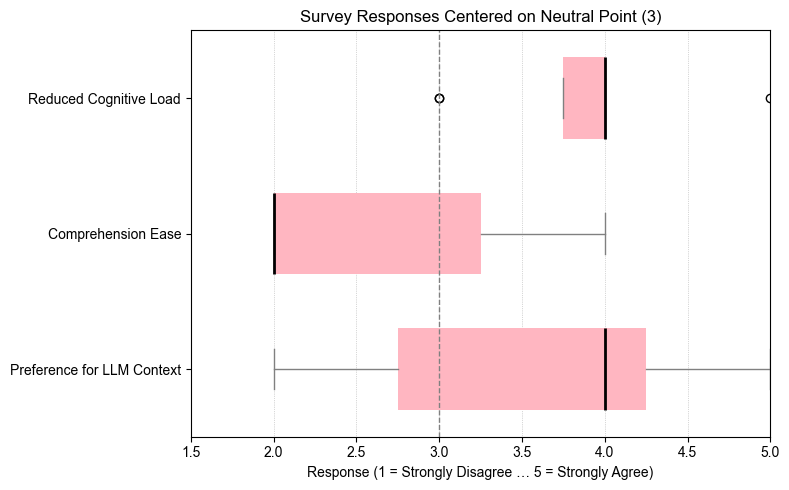

In [24]:
plt.rcParams['font.family'] = 'Arial'

df = pd.read_csv(CSV_PATH)

questions = {
    'Preference for LLM Context': 'Q1_1',
    'Comprehension Ease':         'Q3_1',
    'Reduced Cognitive Load':     'Q5_1'
}
for col in questions.values():
    df[col] = pd.to_numeric(df[col], errors='coerce')

labels = list(questions.keys())
values = [df[q].dropna() for q in questions.values()]

fig, ax = plt.subplots(figsize=(8, 5))
bplot = ax.boxplot(
    values,
    vert=False,
    labels=labels,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=0, facecolor='lightpink', edgecolor='lightpink'),
    medianprops=dict(linewidth=2, color='black'),
    whiskerprops=dict(color='grey'),
    capprops=dict(color='grey')
)

ax.axvline(3, color='grey', linestyle='--', linewidth=1)
ax.set_xlim(1.5, 5)
ax.set_xlabel('Response (1 = Strongly Disagree … 5 = Strongly Agree)')
ax.set_title('Survey Responses Centered on Neutral Point (3)')
ax.grid(axis='x', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.savefig('survey_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()



Saved bar chart to survey_overview.png


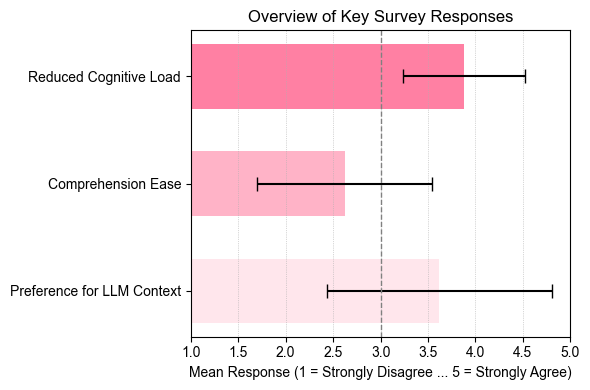

In [26]:

QUESTIONS = {
    'Preference for LLM Context': 'Q1_1',
    'Comprehension Ease':         'Q3_1',
    'Reduced Cognitive Load':     'Q5_1'
}

PINKS = ['#ffe6ec', '#ffb3c7', '#ff80a3']

df = pd.read_csv(CSV_PATH)

for col in QUESTIONS.values():
    df[col] = pd.to_numeric(df[col], errors='coerce')

data = df[list(QUESTIONS.values())]

summary = pd.DataFrame({
    'N':      data.count(),
    'Mean':   data.mean(),
    'Median': data.median(),
    'SD':     data.std()
})

summary.index = list(QUESTIONS.keys())

summary = summary.round(2)
means = summary['Mean']
errors = summary['SD']
labels = summary.index

fig, ax = plt.subplots(figsize=(6, 4))

y_pos = np.arange(len(labels))
bars = ax.barh(
    y=y_pos,
    width=means,
    xerr=errors,
    color=PINKS,
    edgecolor='none',
    height=0.6,
    capsize=5
)

ax.axvline(3, color='grey', linestyle='--', linewidth=1)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Mean Response (1 = Strongly Disagree ... 5 = Strongly Agree)')
ax.set_title('Overview of Key Survey Responses')
ax.set_xlim(1, 5)

ax.grid(axis='x', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('survey_overview.png', dpi=300)
print("Saved bar chart to survey_overview.png")
